In [1]:
import torch
from data import DEData
from plot import plot_output
from torch.utils.data import DataLoader

In [2]:
ngpu = 0
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [3]:
# If you haven't trained a model yet, please go to the file 'train_model.ipynb' first!
dE_detas_model = torch.load('./dE_model.pt', map_location=torch.device(device))
dE_detas_model.eval()

DEModel(
  (conv): ConvTranspose1d(1, 1, kernel_size=(33,), stride=(2,), padding=(16,), bias=False)
  (linear): Linear(in_features=127, out_features=141, bias=False)
)

In [4]:
dataset = DEData()

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True
)

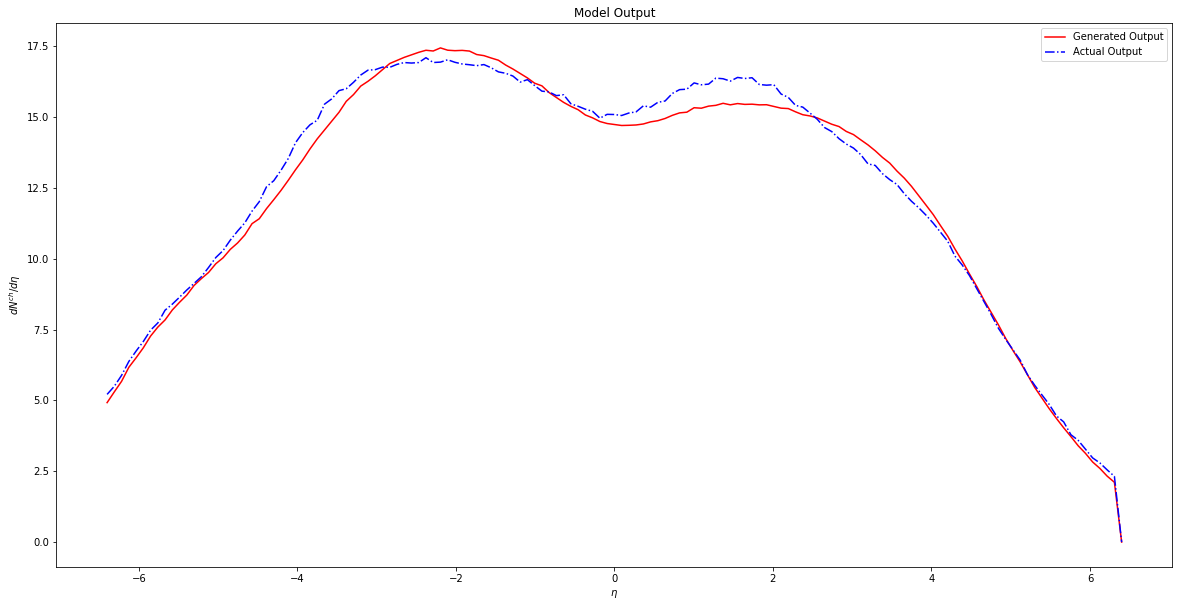

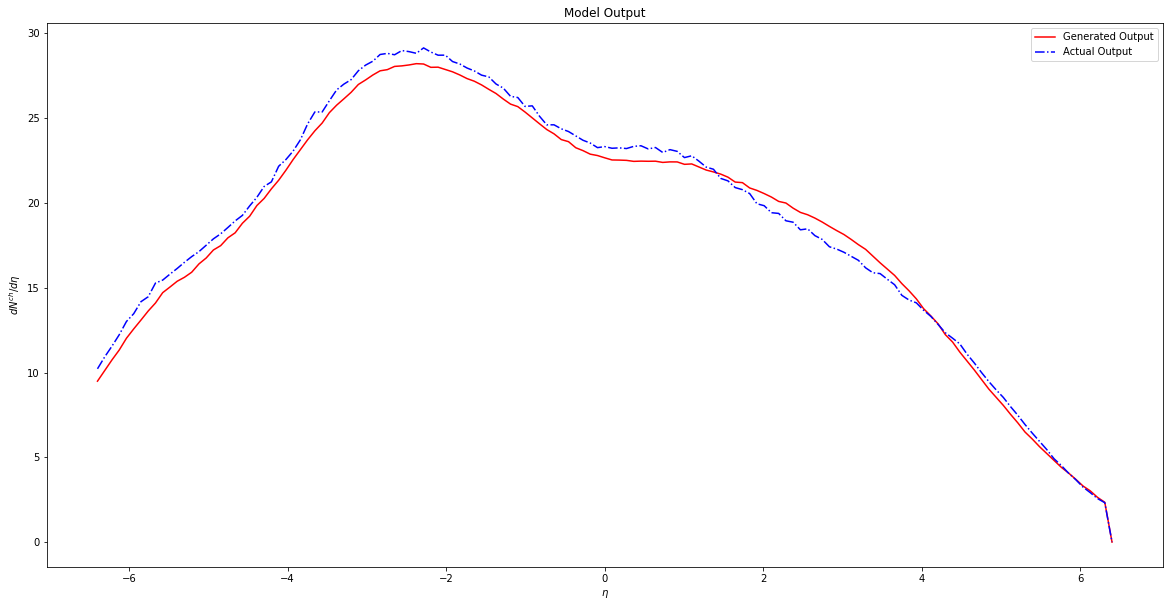

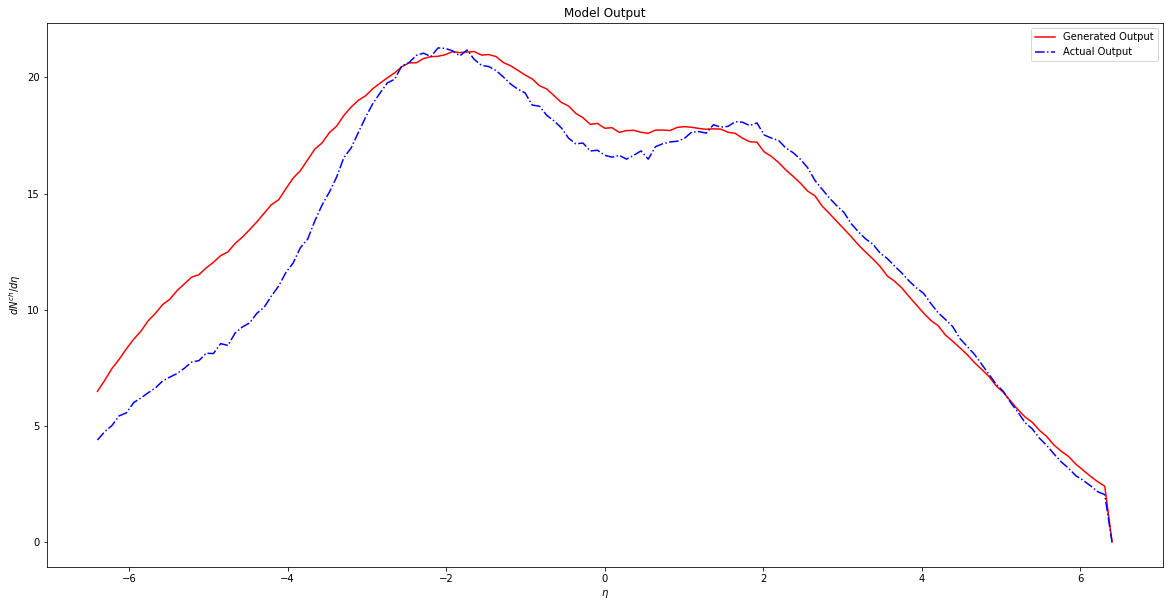

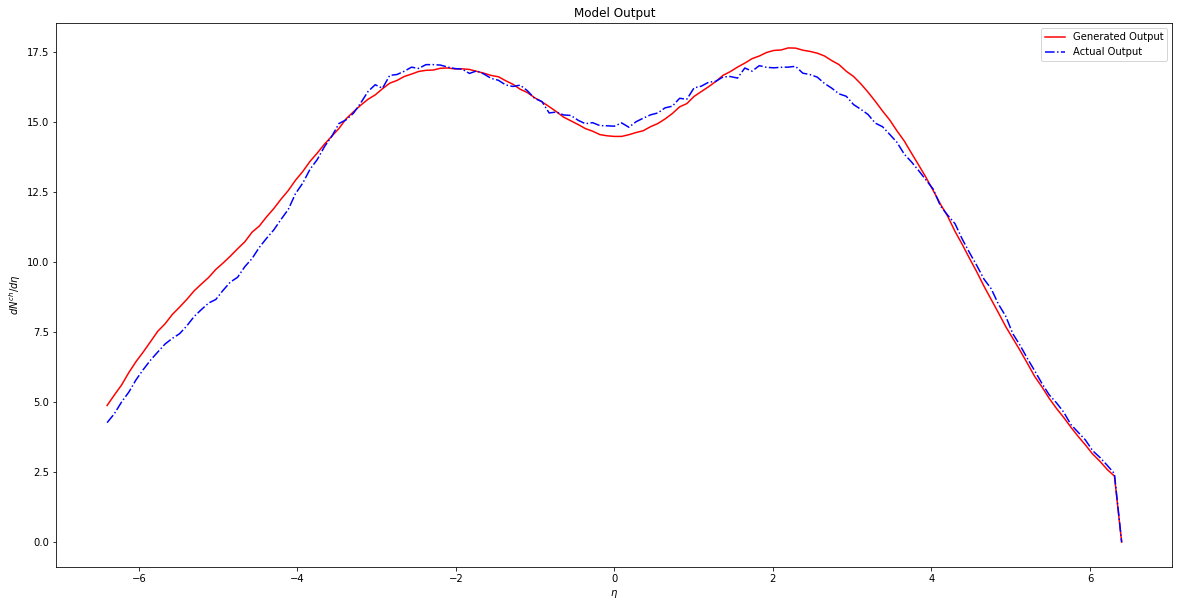

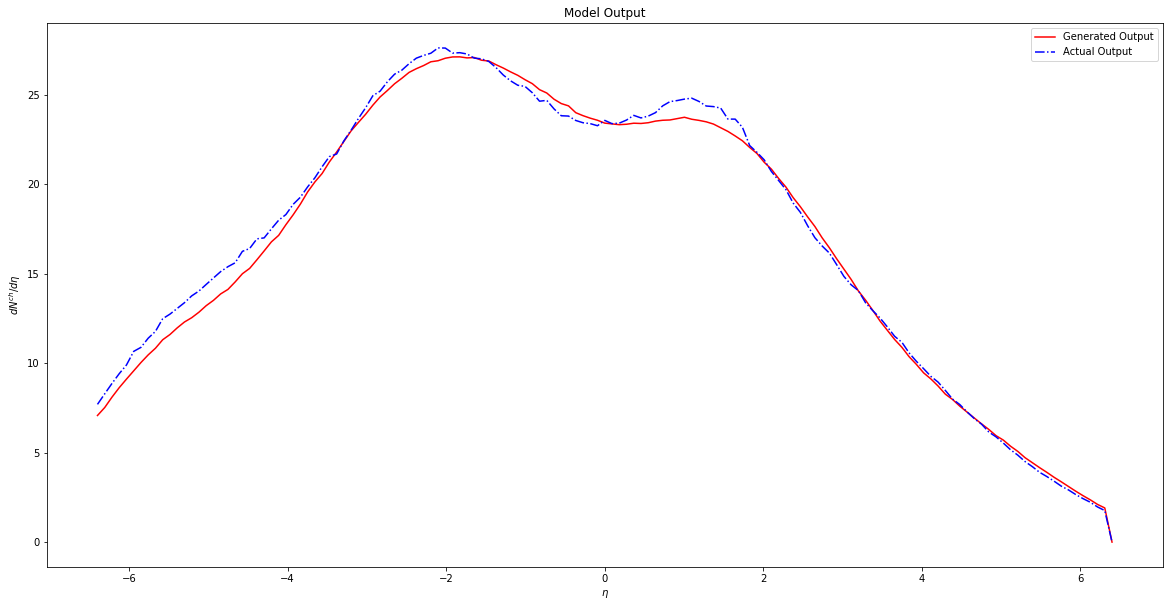

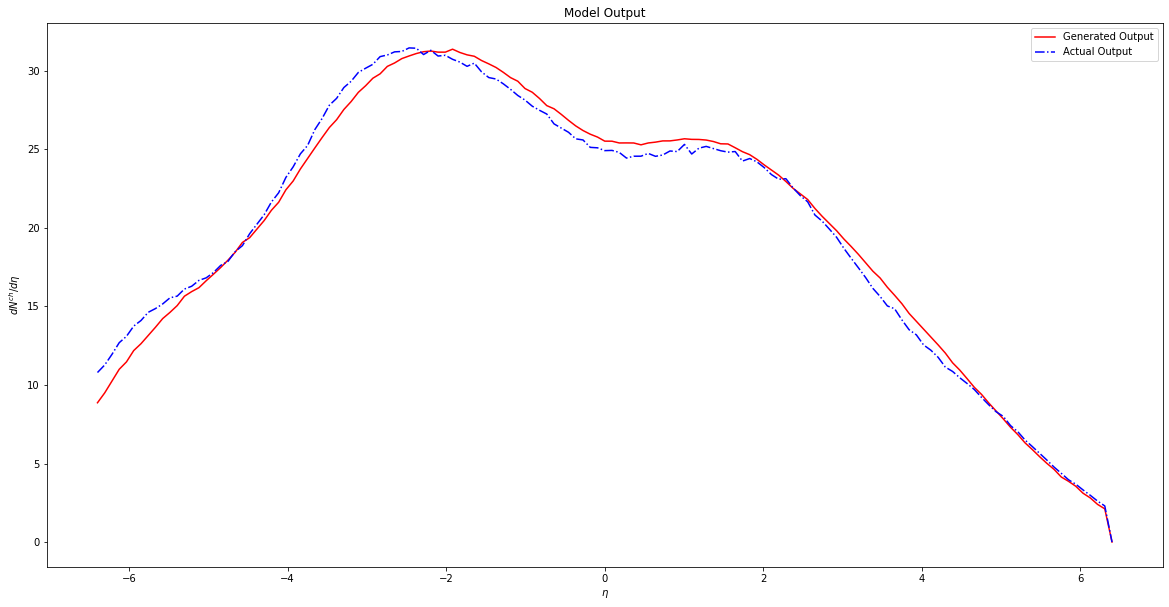

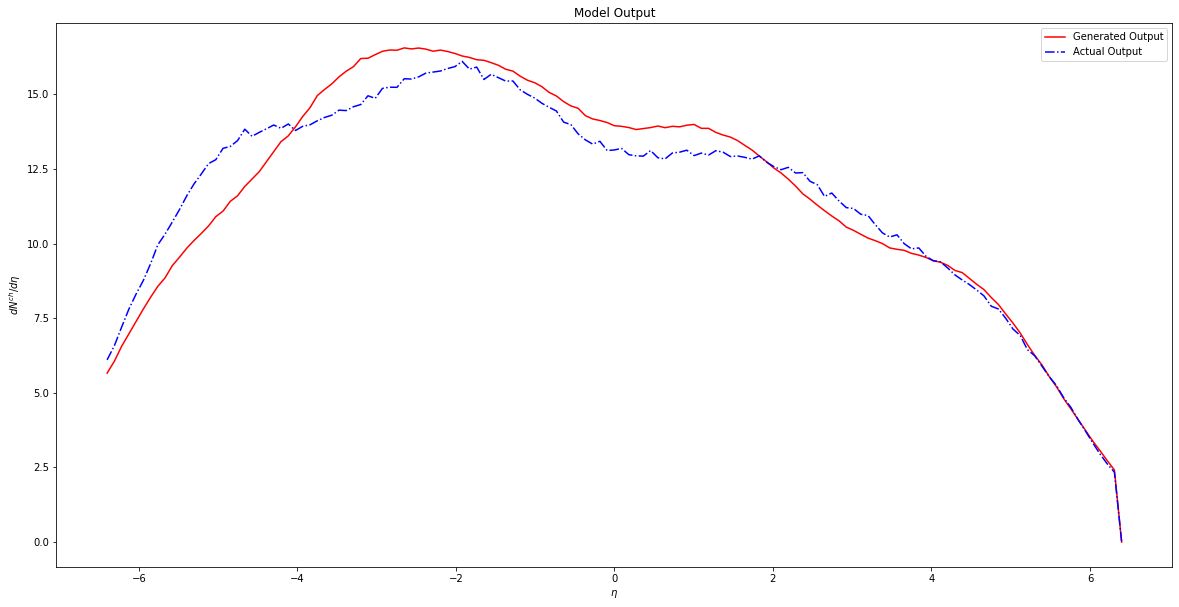

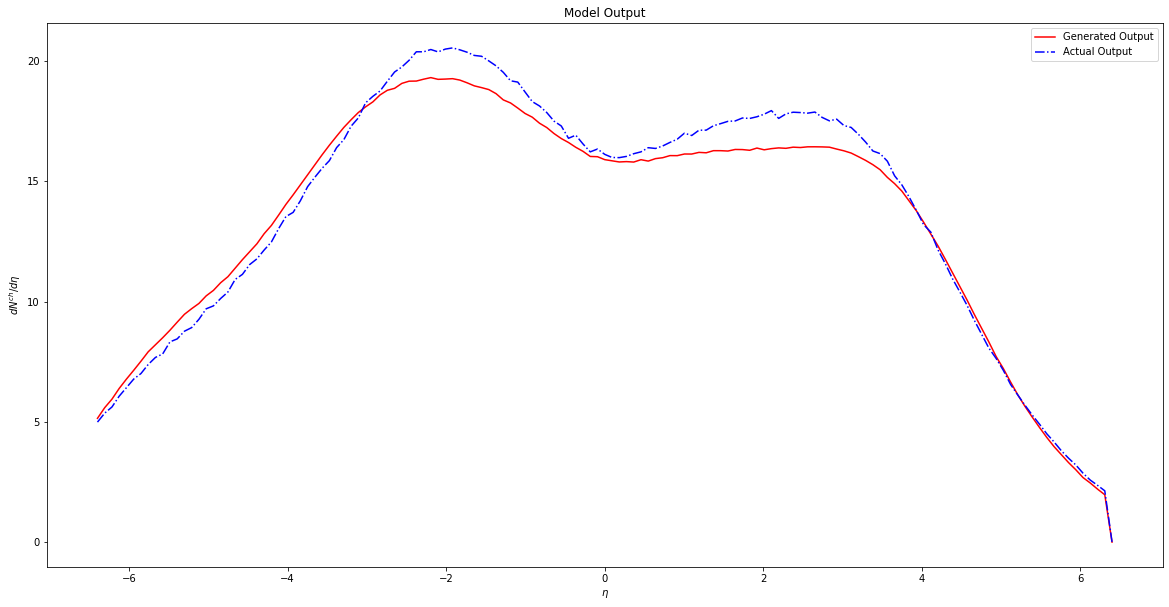

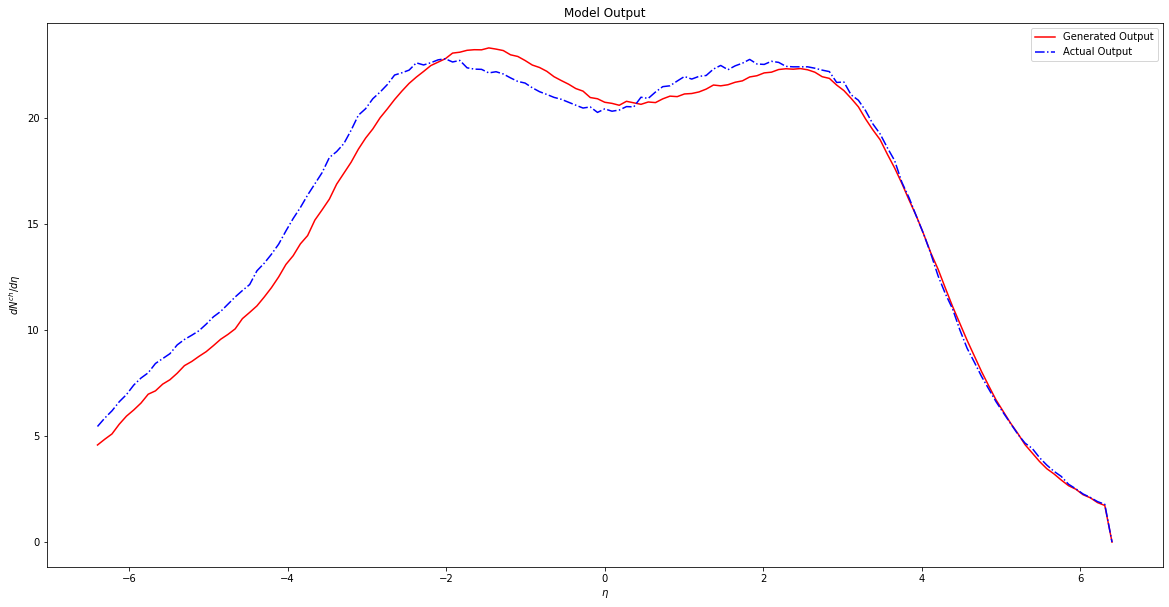

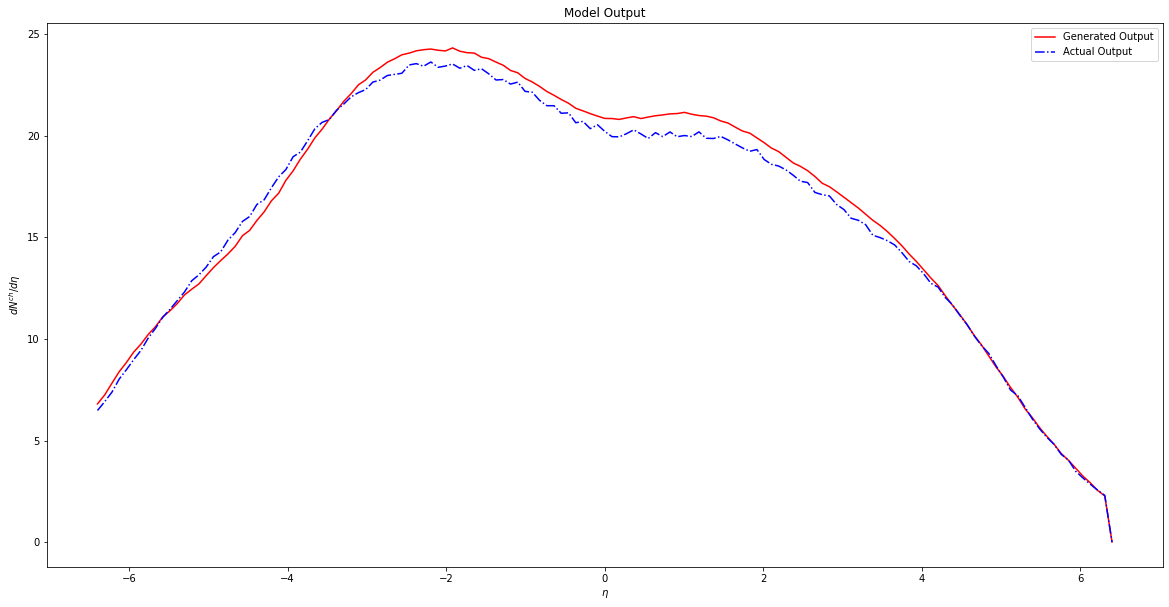

In [5]:
# How many you want to see
limit = 10

for i, data in enumerate(data_loader):
    if i >= limit:
        break
    dE_detas_initial = data[0]
    dNch_detas_final = data[1]
    output = dE_detas_model(dE_detas_initial.float())
    plot_output(output.detach().numpy(), dNch_detas_final)